In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("pima-indians-diabetes.data.txt")
columns = [
    "pregnant",
    "glucose",
    "bp",
    "skin",
    "insulin",
    "bmi",
    "pedigree",
    "age",
    "label",
]
df.columns = columns

df.head()

C:\Users\Wesley\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [2]:
feature_cols = ["pregnant", "insulin", "bmi", "age"]
X = df[feature_cols]
y = df.label

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [5]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.734375

In [6]:
y_test.value_counts()

0    131
1     61
Name: label, dtype: int64

In [7]:
y_test.mean()
# percentage ones

0.3177083333333333

In [8]:
# calculate null accuracy (for binary classification)
max(y_test.mean(), 1 - y_test.mean())

0.6822916666666667

In [9]:
from sklearn.metrics import confusion_matrix

print(len(y_test))
confusion_matrix(y_test, y_pred)

192


array([[114,  17],
       [ 34,  27]], dtype=int64)

In [10]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.6136363636363636

In [11]:
model.predict(X_test)[0:10]

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [12]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

(array([1., 1., 2., 0., 1., 3., 0., 0., 1., 1.]),
 array([0.07095908, 0.13240956, 0.19386003, 0.25531051, 0.31676099,
        0.37821147, 0.43966195, 0.50111243, 0.56256291, 0.62401339,
        0.68546386]),
 <BarContainer object of 10 artists>)

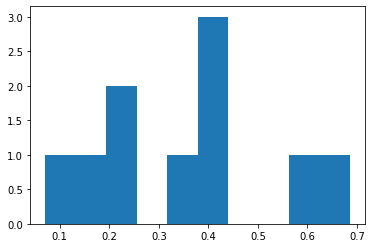

In [13]:
import matplotlib.pyplot as plt

plt.hist(model.predict_proba(X_test)[0:10, 1])

In [14]:
from sklearn.preprocessing import binarize

y_pred_class = binarize(y_pred_prob.reshape(-1, 1), threshold=0.3)[:, 0]

In [15]:
y_pred_class[0:10]

array([1., 1., 1., 1., 0., 1., 1., 0., 0., 0.])

In [16]:
confusion_matrix(y_test, y_pred_class)

array([[71, 60],
       [13, 48]], dtype=int64)

Text(0, 0.5, 'True Positive Rate (Sensitivity)')

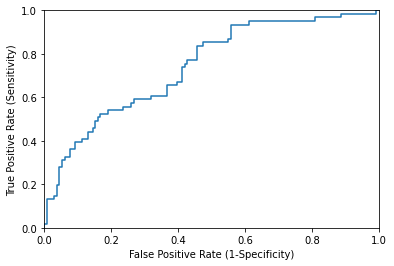

In [17]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate (1-Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")

In [18]:
def eval_threshold(threshold):
    print(
        f"Sensitivity: {tpr[thresholds > threshold][-1]}, Specificity: {1 - fpr[thresholds > threshold][-1]}"
    )


eval_threshold(0.5)

Sensitivity: 0.4426229508196721, Specificity: 0.8702290076335878


In [19]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_prob)

0.7420848454511325

In [21]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X, y, cv=10, scoring="roc_auc").mean()

0.7416923076923077